Mounting Google Drive

In [1]:

!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing libraries

In [2]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


from utils import (
   test, train, plot_losses

)

from model import Net
from torchsummary import summary

from torch.optim.lr_scheduler import StepLR
%matplotlib inline

Updating Device to CUDA

In [3]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu") #c2

CUDA Available? True


Defining data tranformations

In [4]:
train_transforms = transforms.Compose([
   #transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    #transforms.Resize((28, 28)),
    #transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])



Downloading MNIST dataset and splitting to train and test set

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

Creating Data Loaders from train data and test data

In [6]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

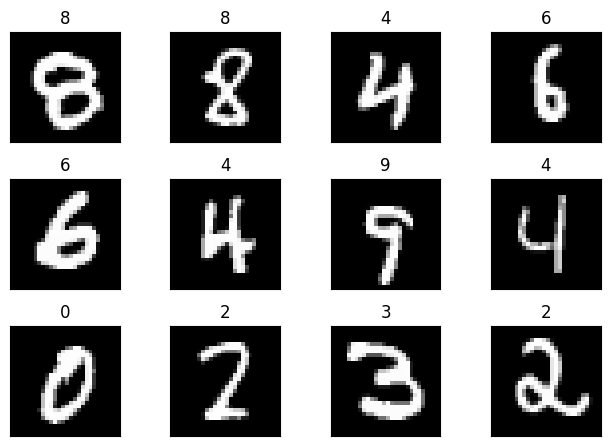

In [7]:
batch_data, batch_label = next(iter(train_loader))
fig = plt.figure()
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.tight_layout()
    plt.imshow(batch_data[i].squeeze(0), cmap='gray')
    plt.title(batch_label[i].item())
    plt.xticks([])
    plt.yticks([])
plt.show()

## Data Statistics

torch.Size([512, 1, 28, 28])
torch.Size([512])


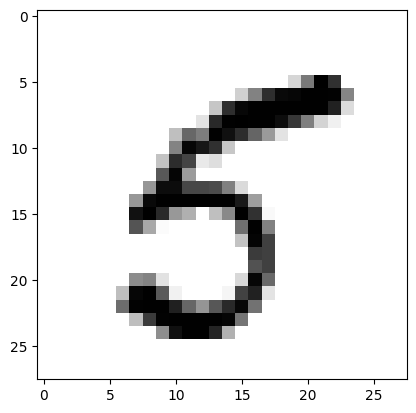

In [8]:
# train_data1 = train_data.train_data
# train_data = train_data.transform(train_data1.numpy())

# print('[Train]')
# print(' - Numpy Shape:', train_data.train_data.cpu().numpy().shape)
# print(' - Tensor Shape:', train_data.train_data.size())
# print(' - min:', torch.min(train_data))
# print(' - max:', torch.max(train_data))
# print(' - mean:', torch.mean(train_data))
# print(' - std:', torch.std(train_data))
# print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

Viewing images

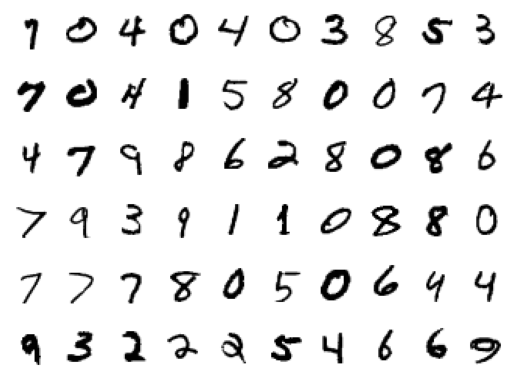

In [9]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

Transferring model to GPU and printing model summary

In [10]:
model1 = Net().to(device)
summary(model1, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
              ReLU-2           [-1, 32, 26, 26]               0
            Conv2d-3           [-1, 64, 24, 24]          18,432
              ReLU-4           [-1, 64, 24, 24]               0
            Conv2d-5          [-1, 128, 22, 22]          73,728
              ReLU-6          [-1, 128, 22, 22]               0
         MaxPool2d-7          [-1, 128, 11, 11]               0
            Conv2d-8           [-1, 32, 11, 11]           4,096
              ReLU-9           [-1, 32, 11, 11]               0
           Conv2d-10             [-1, 64, 9, 9]          18,432
             ReLU-11             [-1, 64, 9, 9]               0
           Conv2d-12            [-1, 128, 7, 7]          73,728
             ReLU-13            [-1, 128, 7, 7]               0
           Conv2d-14             [-1, 1

Training and evaluating the model

In [11]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer)
    test(model, device, test_loader)

EPOCH: 0


Train: Loss=2.3024 Batch_id=117 Accuracy=20.00: 100%|██████████| 118/118 [00:17<00:00,  6.59it/s]


Test set: Average loss: 2.3024, Accuracy: 1586/10000 (15.86%)

EPOCH: 1


Train: Loss=2.3018 Batch_id=117 Accuracy=20.59: 100%|██████████| 118/118 [00:16<00:00,  7.18it/s]


Test set: Average loss: 2.3017, Accuracy: 1793/10000 (17.93%)

EPOCH: 2


Train: Loss=2.2451 Batch_id=117 Accuracy=18.44: 100%|██████████| 118/118 [00:16<00:00,  7.25it/s]


Test set: Average loss: 2.2376, Accuracy: 2036/10000 (20.36%)

EPOCH: 3


Train: Loss=0.3371 Batch_id=117 Accuracy=77.38: 100%|██████████| 118/118 [00:16<00:00,  7.07it/s]


Test set: Average loss: 0.2928, Accuracy: 9100/10000 (91.00%)

EPOCH: 4


Train: Loss=0.2059 Batch_id=117 Accuracy=92.51: 100%|██████████| 118/118 [00:16<00:00,  7.16it/s]


Test set: Average loss: 0.1765, Accuracy: 9469/10000 (94.69%)

EPOCH: 5


Train: Loss=0.0571 Batch_id=117 Accuracy=95.26: 100%|██████████| 118/118 [00:16<00:00,  7.06it/s]


Test set: Average loss: 0.1175, Accuracy: 9629/10000 (96.29%)

EPOCH: 6


Train: Loss=0.0810 Batch_id=117 Accuracy=96.45: 100%|██████████| 118/118 [00:17<00:00,  6.65it/s]


Test set: Average loss: 0.0984, Accuracy: 9683/10000 (96.83%)

EPOCH: 7


Train: Loss=0.0200 Batch_id=117 Accuracy=97.15: 100%|██████████| 118/118 [00:16<00:00,  7.21it/s]


Test set: Average loss: 0.1104, Accuracy: 9645/10000 (96.45%)

EPOCH: 8


Train: Loss=0.0924 Batch_id=117 Accuracy=97.39: 100%|██████████| 118/118 [00:16<00:00,  6.99it/s]


Test set: Average loss: 0.0781, Accuracy: 9761/10000 (97.61%)

EPOCH: 9


Train: Loss=0.0339 Batch_id=117 Accuracy=97.70: 100%|██████████| 118/118 [00:16<00:00,  7.17it/s]


Test set: Average loss: 0.0640, Accuracy: 9799/10000 (97.99%)

EPOCH: 10


Train: Loss=0.0245 Batch_id=117 Accuracy=97.95: 100%|██████████| 118/118 [00:16<00:00,  7.14it/s]


Test set: Average loss: 0.0682, Accuracy: 9777/10000 (97.77%)

EPOCH: 11


Train: Loss=0.0913 Batch_id=117 Accuracy=98.07: 100%|██████████| 118/118 [00:16<00:00,  7.09it/s]


Test set: Average loss: 0.0537, Accuracy: 9824/10000 (98.24%)

EPOCH: 12


Train: Loss=0.0201 Batch_id=117 Accuracy=98.18: 100%|██████████| 118/118 [00:16<00:00,  7.18it/s]


Test set: Average loss: 0.0536, Accuracy: 9826/10000 (98.26%)

EPOCH: 13


Train: Loss=0.0468 Batch_id=117 Accuracy=98.38: 100%|██████████| 118/118 [00:18<00:00,  6.23it/s]


Test set: Average loss: 0.0563, Accuracy: 9826/10000 (98.26%)

EPOCH: 14


Train: Loss=0.0482 Batch_id=117 Accuracy=98.53: 100%|██████████| 118/118 [00:16<00:00,  7.24it/s]


Test set: Average loss: 0.0497, Accuracy: 9846/10000 (98.46%)

EPOCH: 15


Train: Loss=0.0190 Batch_id=117 Accuracy=98.58: 100%|██████████| 118/118 [00:16<00:00,  7.22it/s]


Test set: Average loss: 0.0551, Accuracy: 9837/10000 (98.37%)

EPOCH: 16


Train: Loss=0.0091 Batch_id=117 Accuracy=98.66: 100%|██████████| 118/118 [00:16<00:00,  6.95it/s]


Test set: Average loss: 0.0464, Accuracy: 9848/10000 (98.48%)

EPOCH: 17


Train: Loss=0.0343 Batch_id=117 Accuracy=98.76: 100%|██████████| 118/118 [00:16<00:00,  7.10it/s]


Test set: Average loss: 0.0499, Accuracy: 9843/10000 (98.43%)

EPOCH: 18


Train: Loss=0.0348 Batch_id=117 Accuracy=98.75: 100%|██████████| 118/118 [00:16<00:00,  7.17it/s]


Test set: Average loss: 0.0503, Accuracy: 9837/10000 (98.37%)

EPOCH: 19


Train: Loss=0.0134 Batch_id=117 Accuracy=98.81: 100%|██████████| 118/118 [00:16<00:00,  7.25it/s]


Test set: Average loss: 0.0485, Accuracy: 9847/10000 (98.47%)



## Plot Losses

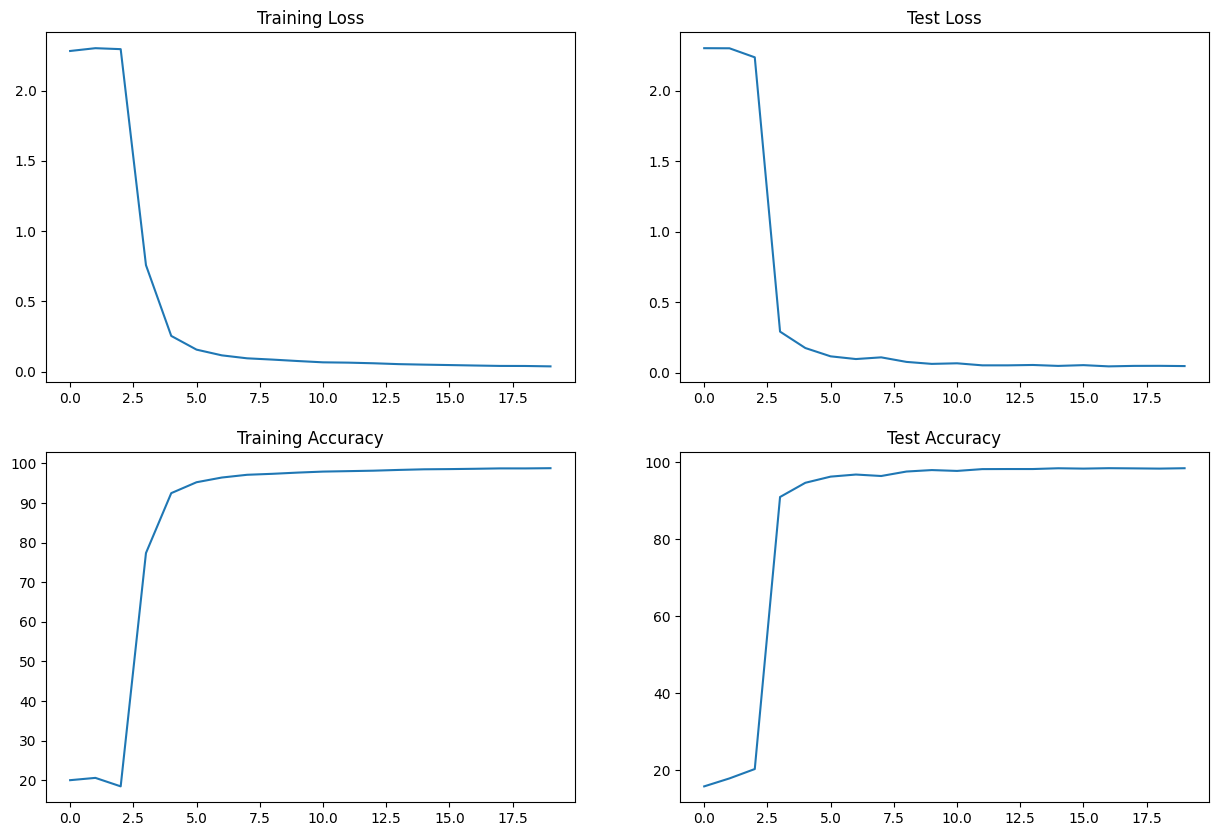

In [12]:
plot_losses()

# Objective:

* Get the everything setup correctly
* Set Transforms, DataLoader
* Set Simple Skeleton
* Set simple training and test logic

# Results:
* Total Parameters: > 194K

* Best Training Accuracy: 98.81

* Best Test Accuracy: 98.47

# Analysis:
Seems slight overfitting. Need improvement like lighter model and good accuracy which is next step to work on.